# Ranking Items from Baskets

In [1]:
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt 
from itertools import combinations

## Baskets

In [2]:
baskets = [
        ["Milk", "Bread", "Eggs"],
        ["Bread", "Butter", "Jam"],
        ["Milk", "Cereal", "Eggs"],
        ["Bread", "Jam"]
    ]

In [3]:
print("Baskets for Custome:")
for i, basket in enumerate(baskets):
    print(f"Basket {i+1}: {', '.join(basket)}")
print("-" * 30)

Baskets for Custome:
Basket 1: Milk, Bread, Eggs
Basket 2: Bread, Butter, Jam
Basket 3: Milk, Cereal, Eggs
Basket 4: Bread, Jam
------------------------------


## Creating the Graph

In [4]:
graph = nx.Graph() # Undirected graph since co-occurrence is mutual

all_items = set()
for basket in baskets:
    # Add items as nodes
    for item in basket:
        all_items.add(item)
        if not graph.has_node(item):
            graph.add_node(item)
            
# Add edges for co-occurring items within the basket
        # For a basket [A, B, C], create edges (A,B), (A,C), (B,C)
        for item1, item2 in combinations(basket, 2):
            if graph.has_edge(item1, item2):
                # Increase weight if items co-occur multiple times (optional refinement)
                # For this example, we'll just ensure the edge exists.
                graph[item1][item2]['weight'] += 1
                pass
            else:
                graph.add_edge(item1, item2)
                graph[item1][item2]['weight'] = 1 

## Check the nodes and edges

In [5]:
graph.nodes

NodeView(('Milk', 'Bread', 'Eggs', 'Butter', 'Jam', 'Cereal'))

In [6]:
graph.edges

EdgeView([('Milk', 'Bread'), ('Milk', 'Eggs'), ('Milk', 'Cereal'), ('Bread', 'Eggs'), ('Bread', 'Butter'), ('Bread', 'Jam'), ('Eggs', 'Cereal'), ('Butter', 'Jam')])

## Calculate Page Rank

In [7]:
pagerank_scores = nx.pagerank(graph)

In [8]:
pagerank_scores

{'Milk': 0.1987111923787704,
 'Bread': 0.23466459855782854,
 'Eggs': 0.1987111923787704,
 'Butter': 0.11384074521163626,
 'Jam': 0.14462047746310927,
 'Cereal': 0.10945179400988483}

## Sort and Print the Ranks

In [9]:
sorted_pagerank = dict(sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True))

In [10]:
sorted_pagerank

{'Bread': 0.23466459855782854,
 'Milk': 0.1987111923787704,
 'Eggs': 0.1987111923787704,
 'Jam': 0.14462047746310927,
 'Butter': 0.11384074521163626,
 'Cereal': 0.10945179400988483}

In [11]:
print("\nItem Ranking based on PageRank (Higher score is more 'central'):")
if sorted_pagerank:
    for item, score in sorted_pagerank.items():
        print(f"{item}: {score:.4f}")


Item Ranking based on PageRank (Higher score is more 'central'):
Bread: 0.2347
Milk: 0.1987
Eggs: 0.1987
Jam: 0.1446
Butter: 0.1138
Cereal: 0.1095


### Visualize the Graph

In [12]:
def visualize_graph(graph, pagerank_scores, title="Item Co-occurrence Graph"):
    """
    Visualizes the item graph with node sizes proportional to PageRank scores.
    (Optional function, requires matplotlib)
    """
    if not graph.nodes() or not pagerank_scores:
        print("Cannot visualize empty graph or scores.")
        return

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, k=0.5, iterations=50) # Layout algorithm

    # Node sizes based on PageRank (scaled for visibility)
    node_sizes = [np.log(score) for score in pagerank_scores.values()]
    # Ensure all nodes in pagerank_scores are in the graph for consistent ordering
    ordered_scores_for_sizing = [pagerank_scores.get(node, 0) * 10000 for node in graph.nodes()]


    nx.draw_networkx_nodes(graph, pos, node_size=ordered_scores_for_sizing, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_edges(graph, pos, alpha=0.3, edge_color='gray')
    nx.draw_networkx_labels(graph, pos, font_size=10)

    plt.title(title)
    plt.axis('off') # Turn off the axis
    plt.tight_layout()
    plt.show()

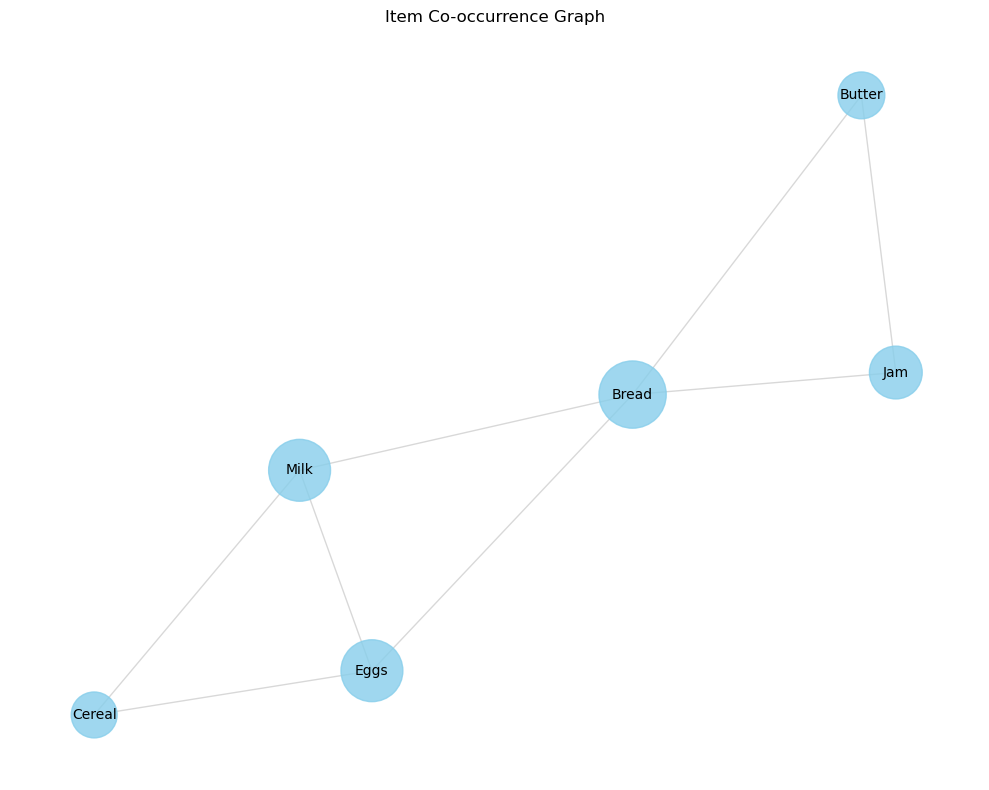

In [13]:
if graph.nodes() and sorted_pagerank:
        # Re-fetch scores for visualization if they were modified (e.g. by fallback)
        current_scores_for_viz = {node: sorted_pagerank.get(node, 0) for node in graph.nodes()}
        try:
            visualize_graph(graph, current_scores_for_viz, title="Item Co-occurrence Graph")
        except Exception as e:
            print(f"\nCould not visualize graph. Matplotlib might be missing or there was an error: {e}")
            print("To install matplotlib: pip install matplotlib")